In [1]:
import os
import maya
import pandas as pd

In [53]:
import vega
from tqdm import tqdm

In [3]:
from bs4 import BeautifulSoup
import re

In [7]:
soup = BeautifulSoup(open("messages/2016-December/019291.html"), "html5lib")
soup.b.contents, soup.a.contents
soup.title.contents[0].strip()
soup.a.contents[0].strip()
soup.b.contents[0].strip()

for item in soup.find_all("li"):
    item.find_all("a", href=lambda href:href)
    
soup.find("pre").get_text()d

'http://www.omgubuntu.co.uk/2016/11/pinebook-arm-laptop-runs-ubuntu\n\nThis looks more promising than other options\n-------------- next part --------------\nAn HTML attachment was scrubbed...\nURL: <http://lists.sugarlabs.org/archive/iaep/attachments/20161220/4da0fc03/attachment.html>\n'

In [38]:
mail_struct = {"subject":"title",
               "author":"b",
               "sender":"a",
               "date":"i" } #,
               #"body":"pre"}

def process_message(file):
    soup = BeautifulSoup(open(file), "html5lib")
    result = {}
    for field,ref in mail_struct.items():
        try:
            result[field] = soup.find(ref).get_text().strip()
        except AttributeError:
            pass
    return result
        

result = process_message("messages/2016-December/019240.html")

In [9]:
import maya
print(maya.parse("Jan 1").epoch)

1483228800.0


In [129]:
count = 0
results_by_author = {}
results = {}
for file in tqdm(os.listdir("messages/")):
    path = os.path.join("messages/", file)
    if os.path.isdir(path):
        for file in os.listdir(path):
            try:
                int(file[:5])
                result = process_message(os.path.join(path,file))
            except ValueError:
                result = None
            
            if result:
                count = count + 1
                timestamp = maya.parse(result['date']).epoch
                result['timestamp'] = timestamp
                results[count] = result
                #try:
                #    results_by_author[result['author']] += [result]
                #except KeyError:
                #    results_by_author[result['author']] = [result]
                
print(count)

100%|██████████| 25/25 [00:32<00:00,  1.80s/it]

1651


In [130]:
messages = pd.DataFrame.from_dict(results, orient="index")

In [131]:
messages.head()

,subject,author,timestamp,date,sender
1,[IAEP] [SLOBS] Future of Sugar Labs,Samson Goddy,1.480618e+09,Thu Dec 1 18:41:51 EST 2016,samsongoddy at gmail.com
2,[IAEP] [SLOBS] Future of Sugar Labs,Laura Vargas,1.480598e+09,Thu Dec 1 13:13:55 EST 2016,laura at somosazucar.org
3,[IAEP] [SLOBS] [SLOB] meeting reminder,Sebastian Silva,1.480687e+09,Fri Dec 2 13:56:43 EST 2016,sebastian at fuentelibre.org
4,[IAEP] [SLOBS] [SLOB] meeting reminder,Laura Vargas,1.480684e+09,Fri Dec 2 13:05:25 EST 2016,laura at somosazucar.org
5,[IAEP] [SLOBS] [SLOB] meeting reminder,Laura Vargas,1.480671e+09,Fri Dec 2 09:37:40 EST 2016,laura at somosazucar.org


In [135]:
pd.DataFrame(messages.groupby("sender").size()).sort_values(0)

,0
sender,
zibs.shirsh at gmail.com,1
levantamos.para.unir at gmail.com,1
ramarohitreddy.g at research.iiit.ac.in,1
ithomson.nz at gmail.com,1
sanchit.bansal_ug18 at ashoka.edu.in,1
satellitgo at gmail.com,1
gars1029 at gmail.com,1
mpdmanash at gmail.com,1
dwgipk at gmail.com,1


In [133]:
with open("/tmp/messages.csv", "w") as output:
    output.write(messages.to_csv())

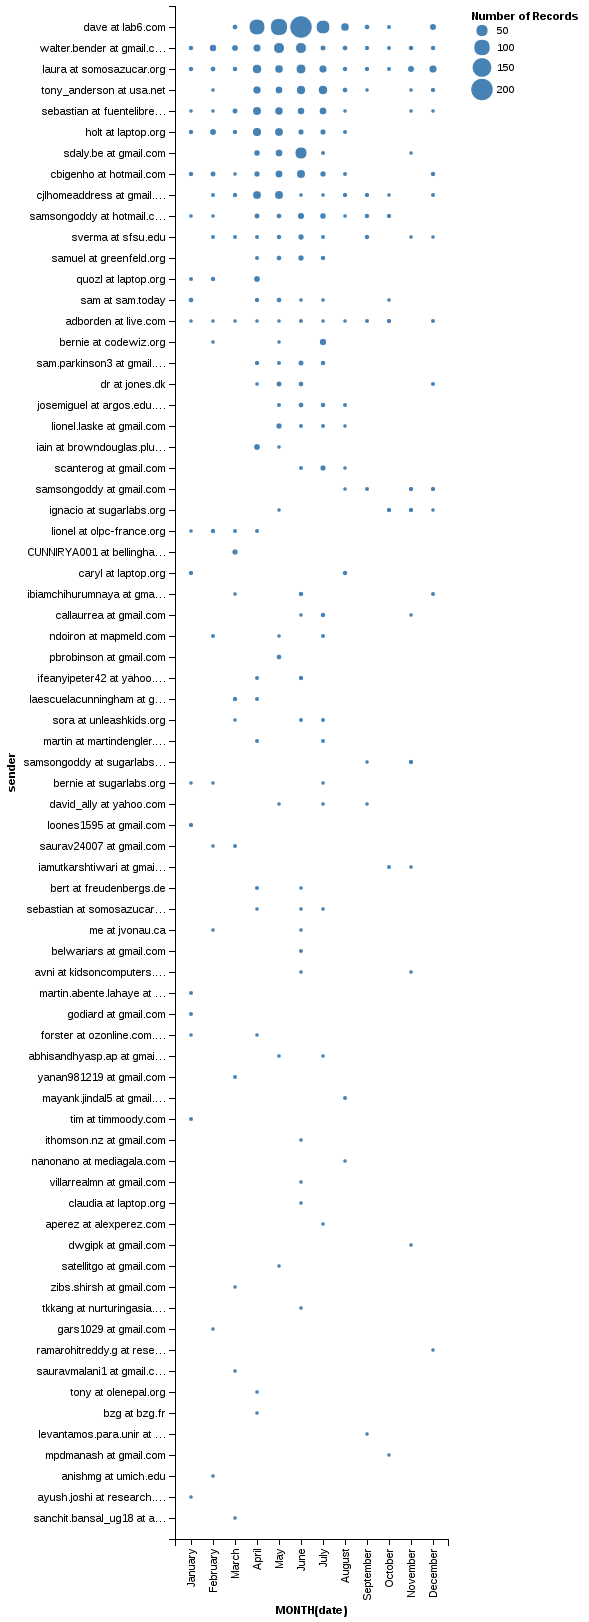

In [134]:
vega.vegalite.VegaLite({
    "mark":"circle",
    "encoding": {
        "size":{"type":"quantitative", "field":"date", "aggregate":"count"},
        "x":{"type":"temporal", "field": "date", "timeUnit":"month"},
        "y":{"type":"nominal", "field": "sender", 
             "sort":{"op":"count", "field":"date", "order":"descending"}}
    }
}, messages)

In [15]:
pd.DataFrame(results, columns=results.pop(3).keys())

,timestamp,body,author,subject,date,sender
